In [726]:
import numpy as np
import matplotlib.pyplot as plt
import iiiraven2 as ir2
from scipy.interpolate import Rbf
from chainconsumer import ChainConsumer
import get_pkbkmst
import get_likelihood

# Construct Fiducial Mean and Compare to Mock

Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 


Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 


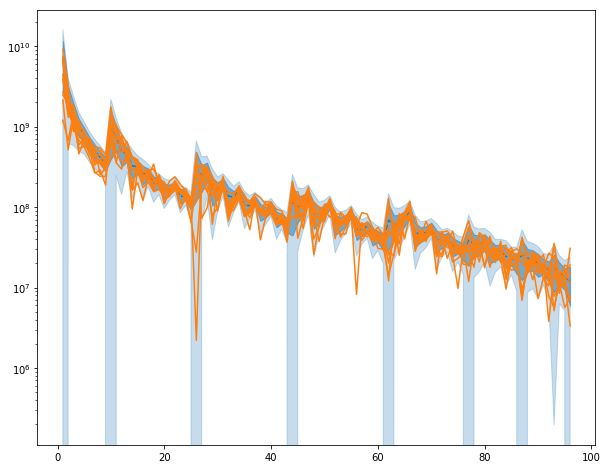

Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 


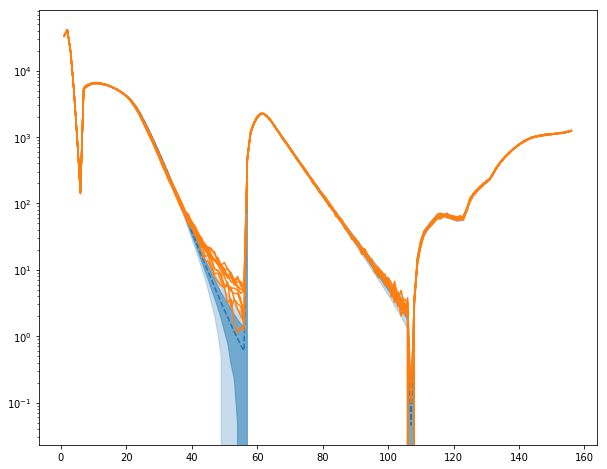

In [22]:
methods = ['pk', 'bk', 'mst']

condition_mst = [0, 1]
usefull = True
include_mult, multiples = True, 10

for i in range(0, len(methods)):
    which_method = methods[i]
    
    fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull, include_mult=include_mult, multiples=multiples)
    mock_data = get_pkbkmst.get_mock(which_method, condition_mst, usefull=usefull, include_mult=include_mult, multiples=multiples)
    
    fid_mean = np.mean(fid_data, axis=0)
    fid_std = np.std(fid_data, axis=0)
    
    x = np.arange(1., len(fid_mean)+1., 1.)
    
    plt.figure(figsize=(10, 8))
    plt.fill_between(x, fid_mean - 2.*fid_std, fid_mean + 2.*fid_std, color='C0', alpha=0.25)
    plt.fill_between(x, fid_mean - fid_std, fid_mean + fid_std, color='C0', alpha=0.5)
    plt.plot(x, fid_mean, linestyle='--', color='C0')
    
    for j in range(0, len(mock_data)):
        plt.plot(x, mock_data[j], color='C1')
    
    plt.yscale('log')
    plt.show()

Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 


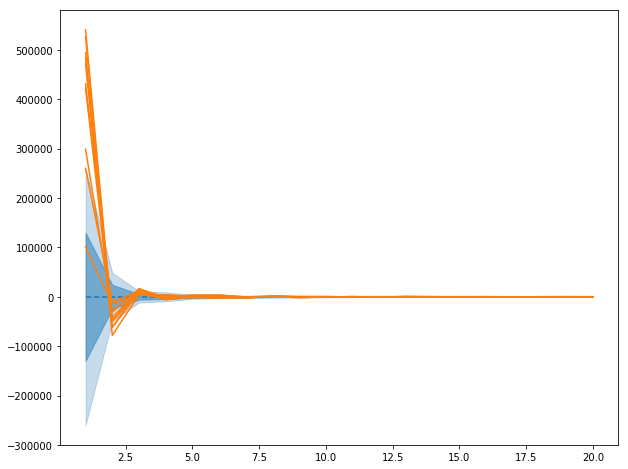

Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 


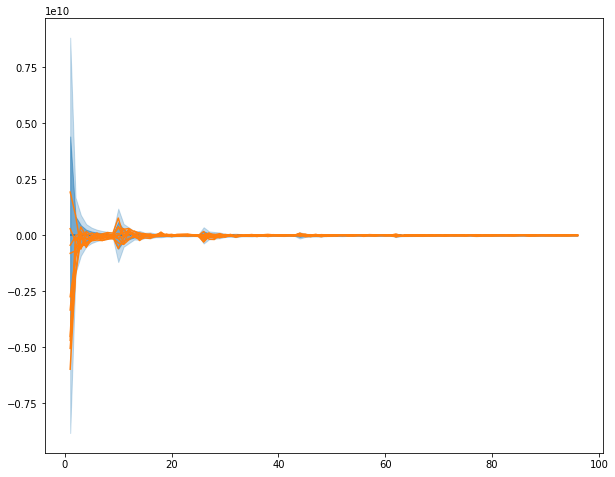

Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 


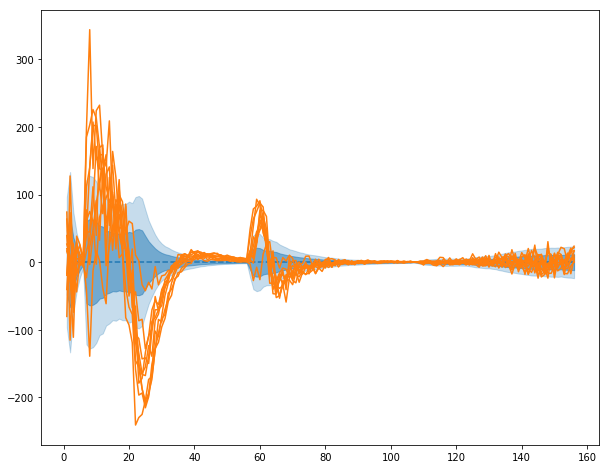

In [23]:
methods = ['pk', 'bk', 'mst']

condition_mst = [0, 1]
usefull = True

for i in range(0, len(methods)):
    which_method = methods[i]
    
    fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull, include_mult=include_mult, multiples=multiples)
    mock_data = get_pkbkmst.get_mock(which_method, condition_mst, usefull=usefull, include_mult=include_mult, multiples=multiples)
    
    fid_mean = np.mean(fid_data, axis=0)
    fid_std = np.std(fid_data, axis=0)
    
    x = np.arange(1., len(fid_mean)+1., 1.)
    
    plt.figure(figsize=(10, 8))
    plt.fill_between(x, - 2.*fid_std, 2.*fid_std, color='C0', alpha=0.25)
    plt.fill_between(x, - fid_std, fid_std, color='C0', alpha=0.5)
    plt.plot(x, fid_mean - fid_mean, linestyle='--', color='C0')
    
    for j in range(0, len(mock_data)):
        plt.plot(x, mock_data[j] - fid_mean, color='C1')
    
    plt.show()

## Use Fiducial to condition MST cut

Getting Fiducial : |####################| 100% 


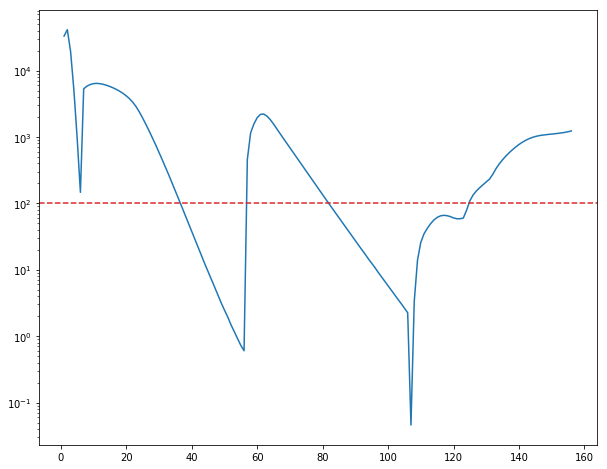

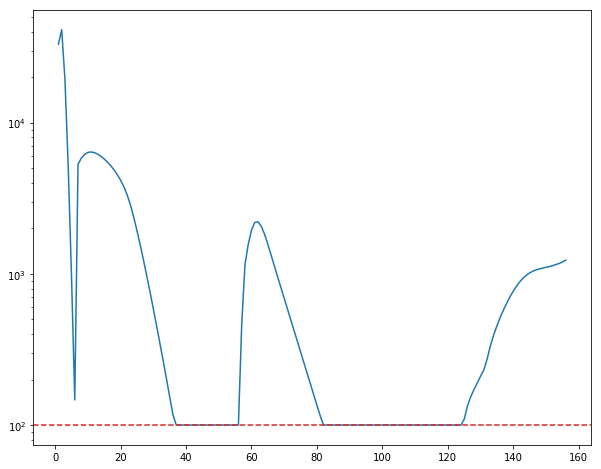

In [24]:
which_method = 'mst'
fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull,
                                    include_mult=include_mult, multiples=multiples)
fid_mean = np.mean(fid_data, axis=0)

x = np.arange(1., len(fid_mean)+1., 1.)

count_min = 100.

plt.figure(figsize=(10, 8))
plt.plot(x, fid_mean)
plt.axhline(count_min, color='C3', linestyle='--')
plt.yscale('log')
plt.show()

condition_mst = np.where(fid_mean > count_min)[0]
condition_not_mst = np.where(fid_mean <= count_min)[0]

# check this works

fid_mean[condition_not_mst] = count_min

plt.figure(figsize=(10, 8))
plt.plot(x, fid_mean)
plt.axhline(count_min, color='C3', linestyle='--')
plt.yscale('log')
plt.show()


# Calculate Covariance

Getting Fiducial : |####################| 100% 


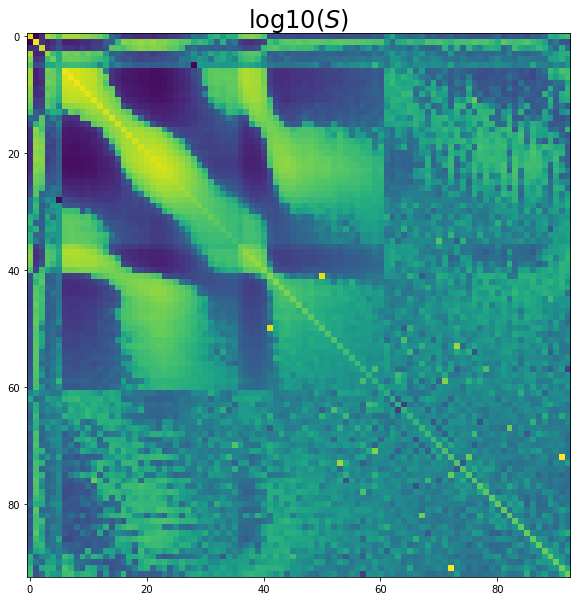

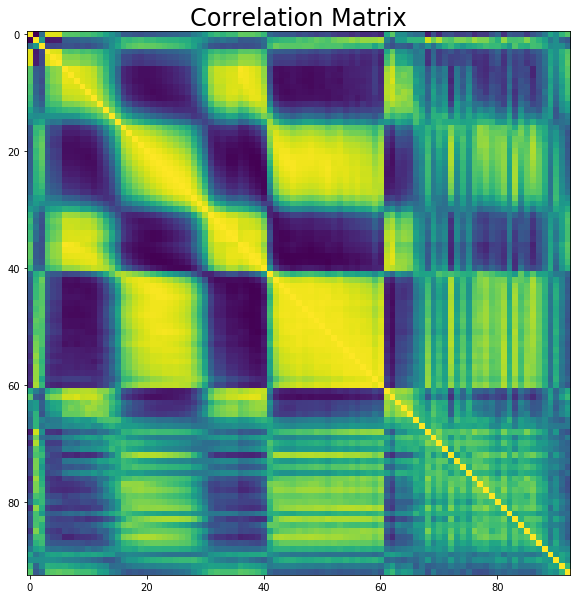

In [25]:
which_method = 'mst'

usefull = False
fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull,
                                    include_mult=include_mult, multiples=multiples)

cov = np.cov(fid_data.T)
inv_cov = np.linalg.inv(cov)

condition = np.where(cov < 0.)

log_cov = np.log10(abs(cov))
log_cov[condition] *= -1.

plt.figure(figsize=(10, 10))
plt.imshow(log_cov)
plt.title(r'$\log10(S)$', fontsize=24)
plt.show()

# correlation matrix

corrcoef = np.corrcoef(cov)

plt.figure(figsize=(10, 10))
plt.imshow(corrcoef)
plt.title(r'Correlation Matrix', fontsize=24)
plt.show()

## Get Likelihood

We will only deal with the main term (i.e. ignore the constants infront of the function given by Niall).

In [26]:
# Params

as_grid, om_grid, mv_grid, s8_grid = get_pkbkmst.get_grid_params()
as_mock, om_mock, mv_mock, s8_mock = get_pkbkmst.get_mock_params()
as_fid, om_fid, mv_fid, s8_fid = get_pkbkmst.get_fiducial_params()

as_min, as_max = 1., 3.5
om_min, om_max = 0.2, 0.5
mv_min, mv_max = 0., 1.
s8_min, s8_max = s8_grid.min(), s8_grid.max()

In [27]:
grid_data = get_pkbkmst.get_grid(which_method, condition_mst, usefull=usefull,
                                 include_mult=include_mult, multiples=multiples)

Getting Grid1 : |####################| 100% 
Getting Grid2 : |####################| 100% 
Getting Grid3 : |####################| 100% 
Getting Grid4 : |####################| 100% 
Getting Grid5 : |####################| 100% 
Getting Grid6 : |####################| 100% 


In [28]:
mock_data = get_pkbkmst.get_mock(which_method, condition_mst, usefull=usefull,
                                 include_mult=include_mult, multiples=multiples)

Getting Mock : |####################| 100% 


In [29]:
fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull,
                                    include_mult=include_mult, multiples=multiples)
fid_mean = np.mean(fid_data, axis=0)
fid_std = np.std(fid_data, axis=0)

Getting Fiducial : |####################| 100% 


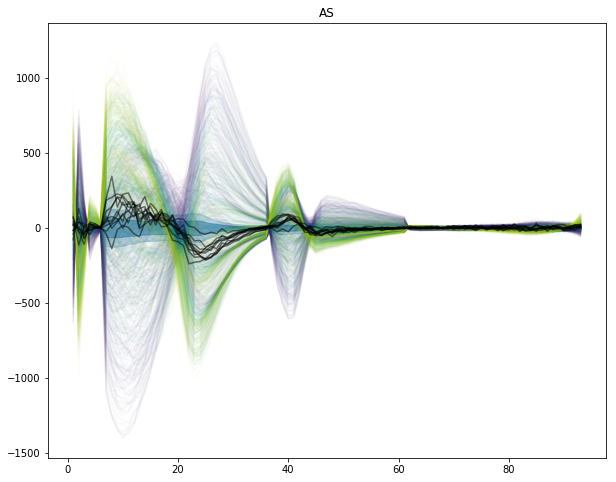

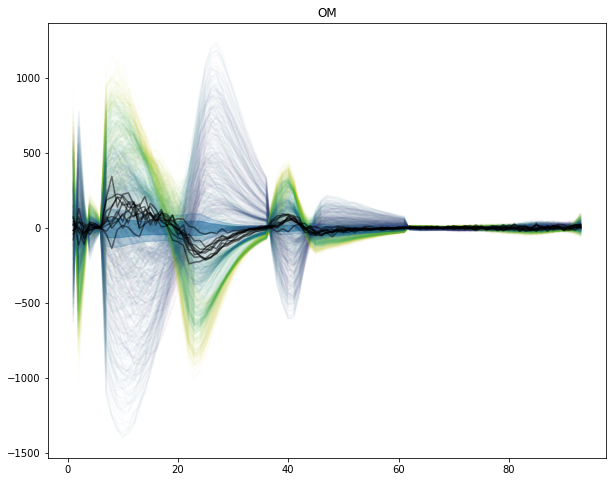

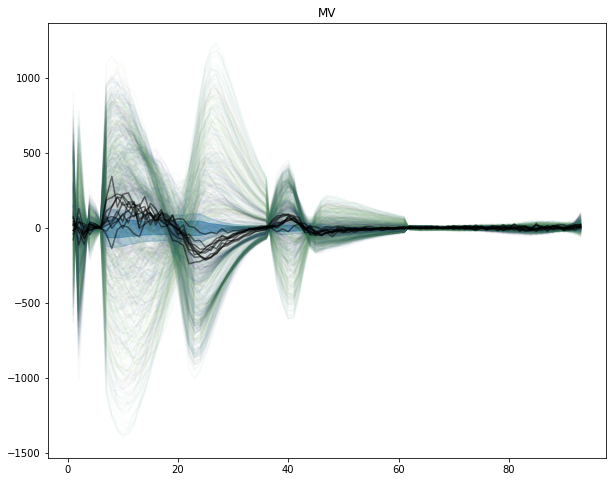

In [30]:
x = np.arange(1., len(grid_data[0])+1., 1.)

colourmap = plt.cm.viridis

plt.figure(figsize=(10, 8))

plt.fill_between(x, - 2.*fid_std, 2.*fid_std, color='C0', alpha=0.25)
plt.fill_between(x, - fid_std, fid_std, color='C0', alpha=0.5)

for i in range(0, len(grid_data)):
    plt.plot(x, grid_data[i]-fid_mean, color=colourmap((as_grid[i] - as_min)/(as_max - as_min)), alpha=0.025)

for i in range(0, len(mock_data)):
    plt.plot(x, mock_data[i]-fid_mean, color='k', alpha=0.5)

#plt.yscale('log')
plt.title(r'AS')
plt.show()

plt.figure(figsize=(10, 8))

plt.fill_between(x, - 2.*fid_std, 2.*fid_std, color='C0', alpha=0.25)
plt.fill_between(x, - fid_std, fid_std, color='C0', alpha=0.5)

for i in range(0, len(grid_data)):
    plt.plot(x, grid_data[i]-fid_mean, color=colourmap((om_grid[i] - om_min)/(om_max - om_min)), alpha=0.025)

for i in range(0, len(mock_data)):
    plt.plot(x, mock_data[i]-fid_mean, color='k', alpha=0.5)

#plt.yscale('log')
plt.title(r'OM')
plt.show()

plt.figure(figsize=(10, 8))

plt.fill_between(x, - 2.*fid_std, 2.*fid_std, color='C0', alpha=0.25)
plt.fill_between(x, - fid_std, fid_std, color='C0', alpha=0.5)

for i in range(0, len(grid_data)):
    plt.plot(x, grid_data[i]-fid_mean, color=colourmap((mv_grid[i] - mv_min)/(mv_max - mv_min)), alpha=0.025)

for i in range(0, len(mock_data)):
    plt.plot(x, mock_data[i]-fid_mean, color='k', alpha=0.5)

#plt.yscale('log')
plt.title(r'MV')
plt.show()

plt.figure(figsize=(10, 8))

plt.fill_between(x, - 2.*fid_std, 2.*fid_std, color='C0', alpha=0.25)
plt.fill_between(x, - fid_std, fid_std, color='C0', alpha=0.5)

for i in range(0, len(grid_data)):
    plt.plot(x, grid_data[i]-fid_mean, color=colourmap((s8_grid[i] - s8_min)/(s8_max - s8_min)), alpha=0.025)

for i in range(0, len(mock_data)):
    plt.plot(x, mock_data[i]-fid_mean, color='k', alpha=0.5)

#plt.yscale('log')
plt.title(r'S8')
plt.show()

## Likelihood Contours

In [714]:
which_method = 'mst'
usefull = False
include_mult = True
multiples = 10

as_grid, om_grid, mv_grid, s8_grid = get_pkbkmst.get_grid_params()
as_mock, om_mock, mv_mock, s8_mock = get_pkbkmst.get_mock_params()
as_fid, om_fid, mv_fid, s8_fid = get_pkbkmst.get_fiducial_params()

as_min, as_max = 1., 3.5
om_min, om_max = 0.2, 0.5
mv_min, mv_max = 0., 0.5
s8_min, s8_max = s8_grid.min(), s8_grid.max()

fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull,
                                    include_mult=include_mult, multiples=multiples)

grid_data = get_pkbkmst.get_grid(which_method, condition_mst, usefull=usefull,
                                 include_mult=include_mult, multiples=multiples)

mock_data = get_pkbkmst.get_mock(which_method, condition_mst, usefull=usefull,
                                 include_mult=include_mult, multiples=multiples)

Getting Fiducial : |####################| 100% 
Getting Grid1 : |####################| 100% 
Getting Grid2 : |####################| 100% 
Getting Grid3 : |####################| 100% 
Getting Grid4 : |####################| 100% 
Getting Grid5 : |####################| 100% 
Getting Grid6 : |####################| 100% 
Getting Mock : |####################| 100% 


In [715]:
condition = np.where(mv_grid < 0.5)[0]

as_grid = as_grid[condition]
om_grid = om_grid[condition]
mv_grid = mv_grid[condition]
s8_grid = s8_grid[condition]
grid_data = grid_data[condition]

print np.shape(as_grid), np.shape(om_grid), np.shape(mv_grid), np.shape(grid_data)

(653,) (653,) (653,) (653, 93)


In [716]:
cov = np.cov(fid_data.T)
inv_cov = np.linalg.inv(cov)

In [717]:
ln_probs = []

N, M = 1000., 3.
precision = inv_cov

for i in range(0, len(mock_data)):
    data = mock_data[i]
    ln_prob = []
    for j in range(0, len(grid_data)):
        model = grid_data[j]
        ln_prob_val = get_likelihood.get_lnP(data, model, precision, N, M)
        ln_prob.append(ln_prob_val)
    ln_probs.append(np.array(ln_prob))
ln_probs = np.array(ln_probs)

In [718]:
ln_probs_fid = []

N, M = 1000., 3.
precision = inv_cov

for i in range(0, len(fid_data)):
    data = fid_data[i]
    ln_prob = []
    for j in range(0, len(grid_data)):
        model = grid_data[j]
        ln_prob_val = get_likelihood.get_lnP(data, model, precision, N, M)
        ln_prob.append(ln_prob_val)
    ln_probs_fid.append(np.array(ln_prob))
ln_probs_fid = np.array(ln_probs_fid)

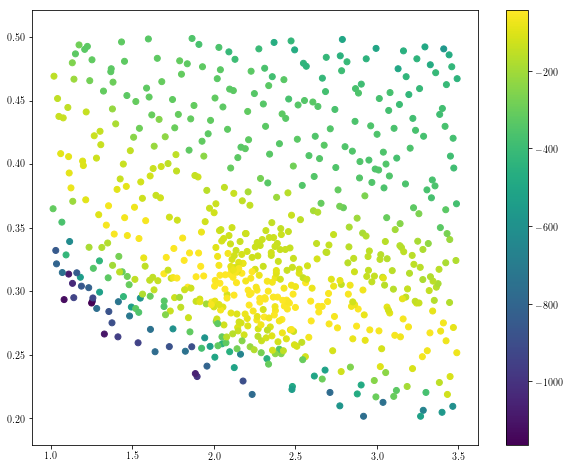

In [719]:
ln_probs_fid_mean = np.mean(ln_probs_fid, axis=0)
ln_probs_fid_std = np.std(ln_probs_fid, axis=0)

plt.figure(figsize=(10., 8.))
cb = plt.scatter(as_grid, om_grid, c=ln_probs_fid_mean)
plt.colorbar(cb)
plt.show()

plt.figure(figsize=(10., 8.))
cb = plt.scatter(as_grid, om_grid, c=ln_probs_fid_std)
plt.colorbar(cb)
plt.show()

In [720]:
# 2D Example

mv_min = 0.
mv_max = 0.5

ngrid = 50
#as_box, om_box = np.mgrid[as_min:as_max:ngrid*1j, om_min:om_max:ngrid*1j]#, mv_min:mv_max:ngrid*1j]
as_box, om_box, mv_box = np.mgrid[as_min:as_max:ngrid*1j, om_min:om_max:ngrid*1j, mv_min:mv_max:ngrid*1j]

as_box = as_box.flatten()
om_box = om_box.flatten()
mv_box = mv_box.flatten()
#mv_box = 0.06*np.ones(len(as_box))

ln_prob = ln_probs[0]
ln_prob = np.mean(ln_probs, axis=0)

In [721]:
as_g = (as_grid-as_min)/(as_max-as_min)
om_g = (om_grid-om_min)/(om_max-om_min)
mv_g = (mv_grid-mv_min)/(mv_max-mv_min)

as_b = (as_box-as_min)/(as_max-as_min)
om_b = (om_box-om_min)/(om_max-om_min) 
mv_b = (mv_box-mv_min)/(mv_max-mv_min)

ln_gaussian = []
sig = 0.04

for i in range(0, len(as_b)):
    r = np.sqrt((as_g - as_b[i])**2. + (om_g - om_b[i])**2. + (mv_g - mv_b[i])**2.)
    weight = np.exp(-0.5*(r**2.)/sig**2.)
    ln_gaussian.append(np.sum(weight*ln_prob)/np.sum(weight))
    
ln_gaussian = np.array(ln_gaussian)

np.savez('data/' + which_method + '_mean_ln_gaussian.npz', ln_gaussian=ln_gaussian)

r_threshold = 0.1

for i in range(0, len(ln_gaussian)):
    val = get_likelihood.get_nearest(as_box.flatten()[i], om_box.flatten()[i], mv_box.flatten()[i],
                                    as_min, as_max, om_min, om_max, mv_min, mv_max,
                                    as_grid, om_grid, mv_grid, r_threshold)
    if val != 0.:
        ln_gaussian[i] = ln_gaussian.min()
    ir2.progress_bar(i, len(ln_gaussian))

|####################| 100% 


In [722]:
fid_mu = []
counts = []
count = 3
for i in range(0, len(fid_data)):
    _d = np.copy(fid_data[i])
    if count == 3:
        if i != 0:
            #print i, '1'
            fid_mu.append(d/3.)
            counts.append(count)
        #print i, '2'
        count = 1
        d = _d
        #print d
    else:
        #print i, '3'
        count += 1
        d = d + _d
        #print d

fid_mu = np.array(fid_mu)
print np.shape(fid_mu)

print counts
plt.figure()
plt.plot(fid_data[0])
plt.plot(np.mean(fid_data, axis=0))
plt.plot(np.mean(fid_mu, axis=0))
plt.plot(fid_mu.T)
plt.show()

(333, 93)
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

333


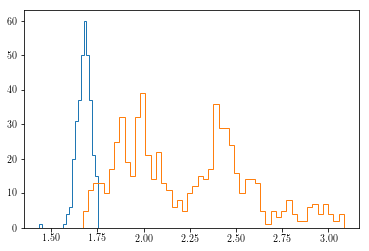

In [723]:
print len(fid_mu)

ln_prob_fid_bias = []

N, M = 1000., 3.
precision = inv_cov

data = fid_data[0]

for i in range(0, len(fid_mu)):
    model = fid_mu[i]
    ln_prob_val = get_likelihood.get_lnP(data, model, precision, N, M)
    ln_prob_fid_bias.append(ln_prob_val)
ln_prob_fid_bias = np.array(ln_prob_fid_bias)

plt.figure()
plt.hist(np.log10(abs(ln_prob_fid_bias)), 20, histtype='step')
plt.hist(np.log10(abs(ln_prob)), 50, histtype='step')
plt.show()

ln_prob_fid_bias_std = np.std(ln_prob_fid_bias)
#print ln_prob_fid_bias_std
#print ln_probs_fid_std

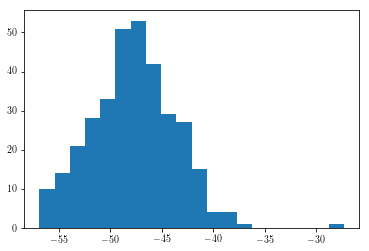

4.07175491214


In [724]:
ln_prob_fid_bias = []
#for j in range(0, len(fid_data)):
j = 0
data = fid_data[j]
for i in range(0, len(fid_mu)):
    model = fid_mu[i]
    ln_prob_val = get_likelihood.get_lnP(data, model, precision, N, M)
    ln_prob_fid_bias.append(ln_prob_val)
ln_prob_fid_bias = np.array(ln_prob_fid_bias)

plt.figure()
plt.hist(ln_prob_fid_bias, 20)
plt.show()

#print ln_prob_fid_bias
print np.std(ln_prob_fid_bias)

In [697]:
ln_gaussian_est = []
sig = 0.07

print ln_prob_fid_bias_std

for i in range(0, len(as_g)):
    r = np.sqrt((as_g - as_g[i])**2. + (om_g - om_g[i])**2. + (mv_g - mv_g[i])**2.)
    weight = np.exp(-0.5*(r**2.)/sig**2.)
    ln_gaussian_est.append(np.sum(weight*ln_prob)/np.sum(weight))
    
ln_gaussian_est = np.array(ln_gaussian_est)

condition = np.where(ln_prob > ln_prob.max() - 0.05*(ln_prob.max() - ln_prob.min()))[0]
condition = np.where(abs(ln_gaussian_est) < 20.)[0]
print len(condition)
chi2 = np.sum(((ln_gaussian_est[condition] - ln_prob[condition])**2.)/(ln_probs_fid_std[condition]**2. + ln_prob_fid_bias_std**2.))/float(len(ln_gaussian_est[condition]))

print chi2

4.17803383286
0
nan


/Users/krishna/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


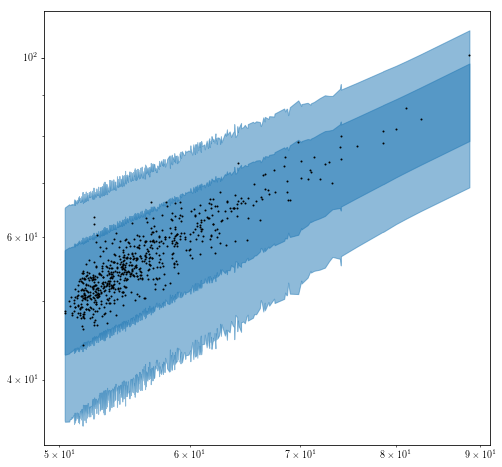

In [700]:
"""
plt.figure(figsize=(8, 8))
#x = np.linspace(abs(ln_prob).min(), abs(ln_prob).max(), 1000)
plt.plot([abs(ln_prob).min(), abs(ln_prob).max()], 
         [abs(ln_prob).min(), abs(ln_prob).max()], color='k')
#plt.errorbar(abs(ln_prob[condition]), abs(ln_gaussian_est[condition]), xerr=ln_probs_fid_std[condition], fmt='o', markersize=1.)
plt.errorbar(abs(ln_prob), abs(ln_gaussian_est), xerr=np.sqrt(ln_probs_fid_std**2. + ln_prob_fid_bias_std**2.), fmt='o', markersize=1.)
plt.xscale('log')
plt.yscale('log')
plt.show()
"""

sorted_ln = np.array(sorted(zip(abs(ln_gaussian_est), abs(ln_prob), np.sqrt(ln_probs_fid_std**2. + ln_prob_fid_bias_std**2.))))
x = sorted_ln[:, 0]
y = sorted_ln[:, 1]
xerr = sorted_ln[:, 2]

plt.figure(figsize=(8, 8))
#xx = np.linspace(abs(ln_prob).min(), abs(ln_prob).max(), 10000)
#plt.plot(xx,  color='k')
plt.fill_between(x, x-2.*xerr, x+2.*xerr, alpha=0.5, color='C0')
plt.fill_between(x, x-xerr, x+xerr, alpha=0.5, color='C0')
plt.scatter(abs(ln_gaussian_est), abs(ln_prob), s=1, color='k')
#plt.axvline(20., color='C3', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [649]:
#print np.array(zip(np.mean(fid_data, axis=0), np.mean(fid_mu, axis=0)))

In [650]:
"""
plt.figure(figsize=(10., 8.))
cb = plt.scatter(as_box, om_box, c=ln_gaussian-ln_gaussian.max())
plt.colorbar(cb)
plt.show()

plt.figure(figsize=(10., 8.))
cb = plt.scatter(as_box, om_box, c=np.exp(ln_gaussian-ln_gaussian.max()))
plt.colorbar(cb)
plt.show()
"""

'\nplt.figure(figsize=(10., 8.))\ncb = plt.scatter(as_box, om_box, c=ln_gaussian-ln_gaussian.max())\nplt.colorbar(cb)\nplt.show()\n\nplt.figure(figsize=(10., 8.))\ncb = plt.scatter(as_box, om_box, c=np.exp(ln_gaussian-ln_gaussian.max()))\nplt.colorbar(cb)\nplt.show()\n'

In [651]:
truth = [2.13, 0.3175]
c = ChainConsumer()
c.add_chain([as_box, om_box],
            parameters = ['as', 'om'], 
            weights=np.exp(ln_gaussian - ln_gaussian.max()), grid=True)
c.configure(kde = [2.5], sigmas = [1,2] )
fig = c.plotter.plot(figsize = (7,6), truth=truth)
plt.savefig(which_method + '_2d.pdf')

In [635]:
truth = [2.13, 0.3175, 0.06]
c = ChainConsumer()
c.add_chain([as_box, om_box, mv_box],
            parameters = ['as', 'om', 'mv'], 
            weights=np.exp(ln_gaussian-ln_gaussian.max()), grid=True)
c.configure(kde = [2.5], sigmas = [1,2] )
fig = c.plotter.plot(figsize = (7,6), truth=truth)
plt.savefig(which_method + '.pdf')

In [652]:
which_method = 'pk'
data = np.load('data/' + which_method + '_mean_ln_gaussian.npz')
ln_gaussian_pk = data['ln_gaussian']

which_method = 'bk'
data = np.load('data/' + which_method + '_mean_ln_gaussian.npz')
ln_gaussian_bk = data['ln_gaussian']

which_method = 'mst'
data = np.load('data/' + which_method + '_mean_ln_gaussian.npz')
ln_gaussian_mst = data['ln_gaussian']

truth = [2.13, 0.3175, 0.06]
c = ChainConsumer()
c.add_chain([as_box, om_box, mv_box], parameters = ['as', 'om', 'mv'], 
            weights=np.exp(ln_gaussian_pk-ln_gaussian_pk.max()), grid=True)
c.add_chain([as_box, om_box, mv_box], parameters = ['as', 'om', 'mv'], 
            weights=np.exp(ln_gaussian_bk-ln_gaussian_bk.max()), grid=True)
c.add_chain([as_box, om_box, mv_box], parameters = ['as', 'om', 'mv'], 
            weights=np.exp(ln_gaussian_mst-ln_gaussian_mst.max()), grid=True)
c.configure(kde = [2.5, 2.5, 2.5], sigmas = [1,2] )
fig = c.plotter.plot(figsize = (7,6), truth=truth)
plt.savefig('pk_vs_bk_vs_mst.pdf')

KeyboardInterrupt: 

In [727]:
as_f = 2.13 - as_min
as_f /= as_max - as_min
om_f = 0.3175 - om_min
om_f /= om_max - om_min
mv_f = 0.06 - mv_min
mv_f /= mv_max - mv_min

r = np.sqrt((as_g - as_f)**2. + (om_g - om_f)**2. + (mv_g - mv_f)**2.)

In [734]:
print np.array(sorted(zip(r, as_grid, om_grid, mv_grid)))[:10]

[[ 0.00637758  2.1225      0.31611111  0.0584    ]
 [ 0.01623934  2.13        0.31666667  0.052     ]
 [ 0.0183809   2.1075      0.31722222  0.068     ]
 [ 0.02985343  2.13375     0.31518519  0.0744    ]
 [ 0.03730013  2.10375     0.31944444  0.0424    ]
 [ 0.04845324  2.115       0.31833333  0.084     ]
 [ 0.04880584  2.145       0.31555556  0.036     ]
 [ 0.05462854  2.11875     0.31685185  0.0328    ]
 [ 0.05775686  2.125       0.32798998  0.03703704]
 [ 0.05996962  2.0308642   0.3203125   0.038     ]]


In [740]:
# as_g7 = 2.13 +/- 0.005
# om_g7 = 0.3175 +/- 0.001
# mv_g7 = 0.06 +/- 0.005

nn = 3
as_g7 = np.linspace(2.13 - 0.005, 2.13 + 0.005, nn)
om_g7 = np.linspace(0.3175 - 0.001, 0.3175 + 0.001, nn)
mv_g7 = np.linspace(0.06 - 0.005, 0.06 + 0.005, nn)

print nn**3

print as_g7
print om_g7
print mv_g7

27
[ 2.125  2.13   2.135]
[ 0.3165  0.3175  0.3185]
[ 0.055  0.06   0.065]
